# Nama  : Bima Surya Nurwahid
# NIM   : m183x0325
# Kelas : M06
# Univ  : Universitas Amikom Yogyakarta

# Import Libraries

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# collecting Dataset

In [3]:
!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"bimasuryan","key":"11cb80993c042db2b63e3e07d0214585"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d rpaguirre/tesla-stock-price

  0% 0.00/33.7k [00:00<?, ?B/s]
100% 33.7k/33.7k [00:00<00:00, 23.0MB/s]


In [6]:
!unzip '/content/tesla-stock-price.zip'

Archive:  /content/tesla-stock-price.zip
  inflating: Tesla.csv - Tesla.csv.csv  


In [7]:
df = pd.read_csv('/content/Tesla.csv - Tesla.csv.csv')
df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [8]:
df.shape

(1692, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


## Exploratory Data Analysis (EDA)

In [10]:
df['Volume'] = df['Volume'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   float64
 6   Adj Close  1692 non-null   float64
dtypes: float64(6), object(1)
memory usage: 92.7+ KB


In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

# Statistic Dataset Information

In [13]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


# Data Visulaisation

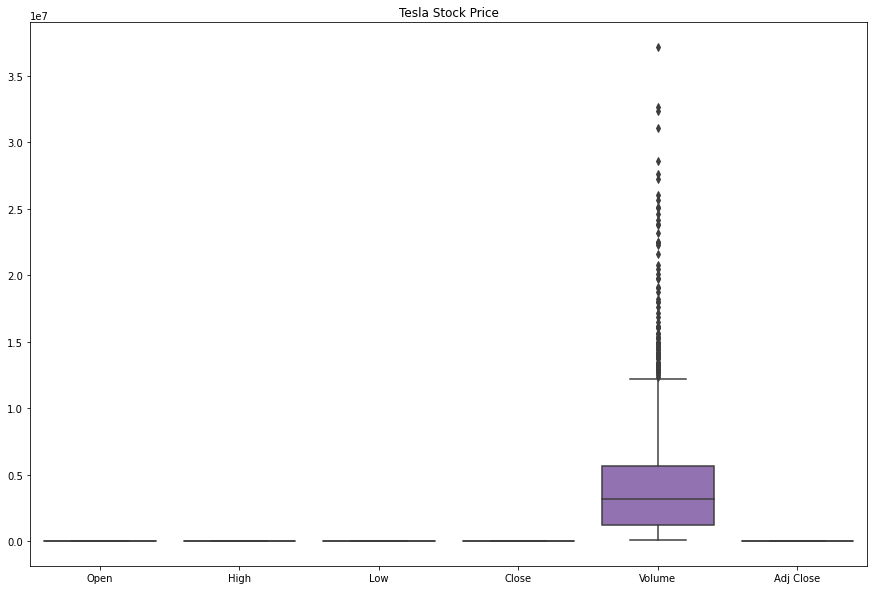

In [14]:
numerical_col = [col for col in df.columns if df[col].dtypes == 'float64']
plt.subplots(figsize=(15,10))
sns.boxplot(data=df[numerical_col]).set_title("Tesla Stock Price")
plt.show()

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(1612, 7)

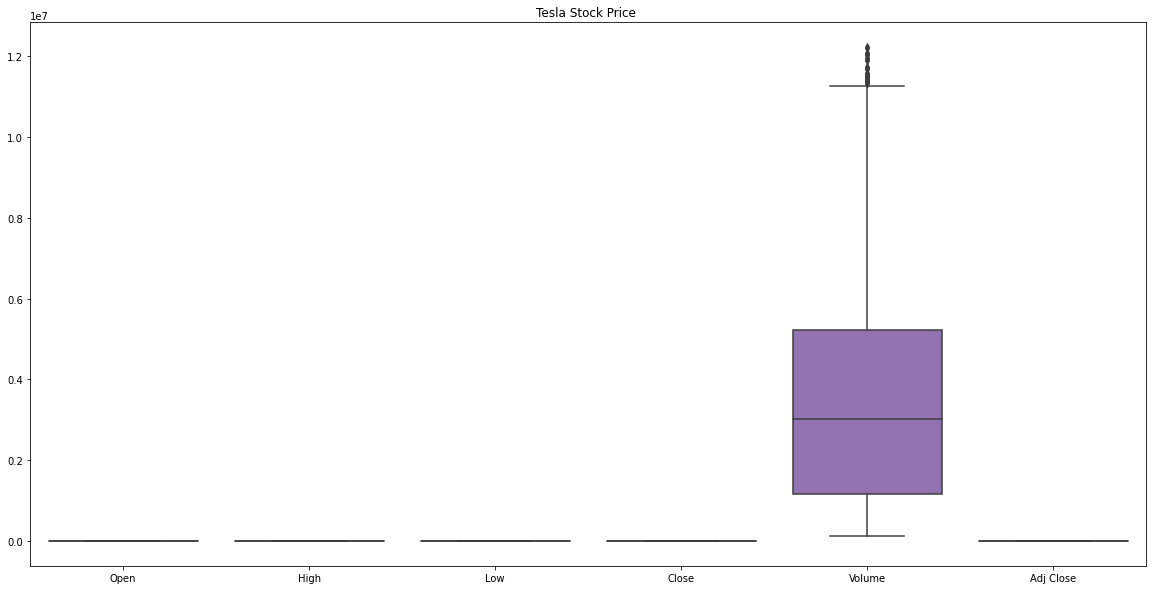

In [16]:
numerical_data = [col for col in df.columns if df[col].dtype == 'float64']
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[numerical_data]).set_title('Tesla Stock Price ')
plt.show()

In [18]:
df.shape

(1612, 7)

# Univariate Analysis

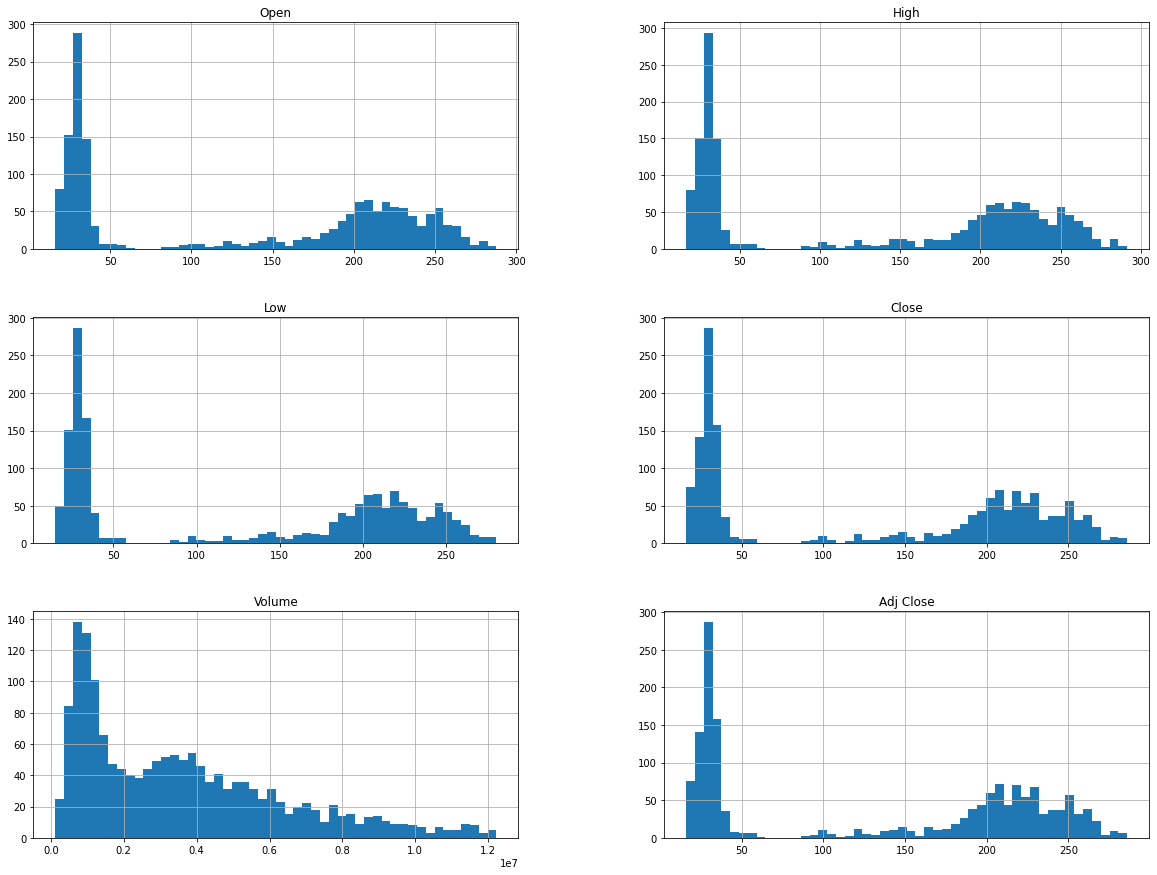

In [46]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Multivariate Analysis

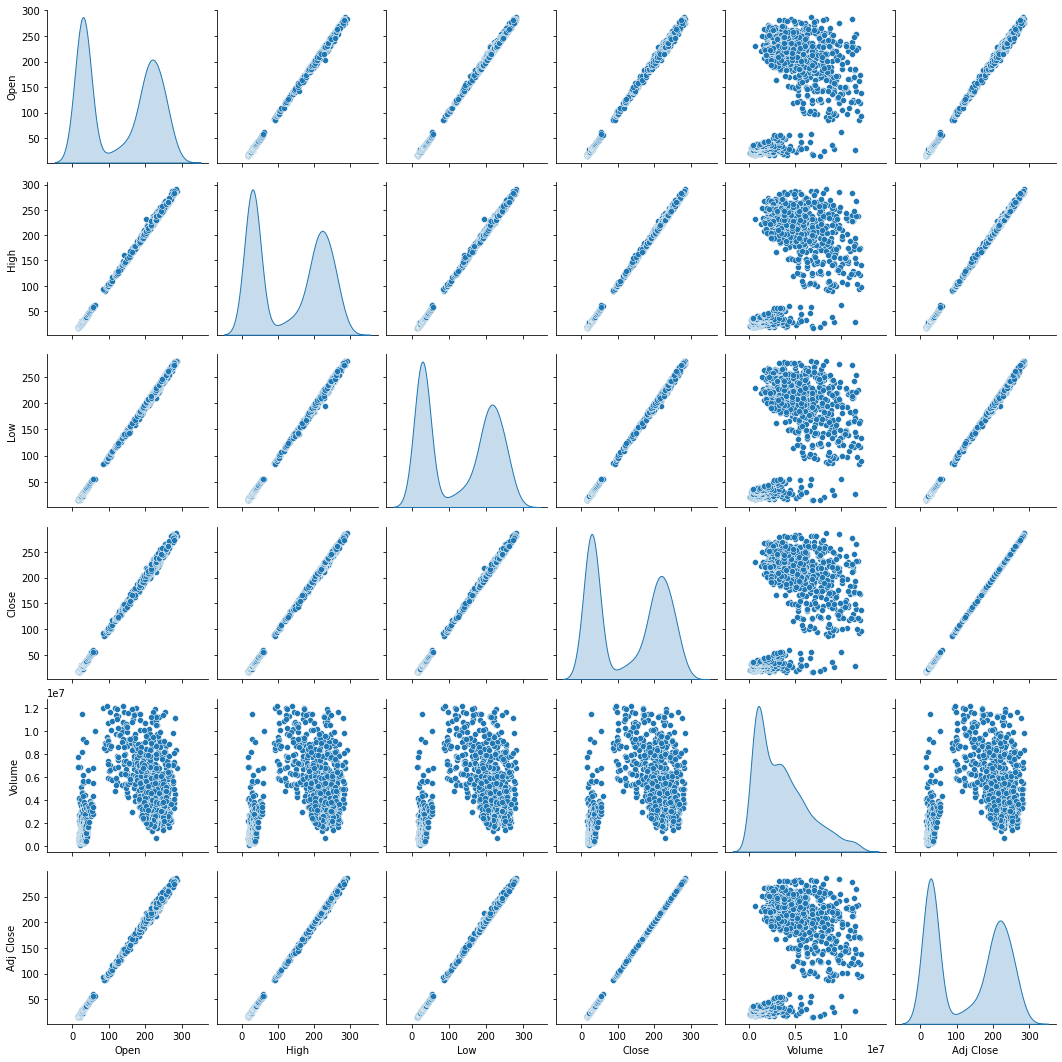

In [47]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

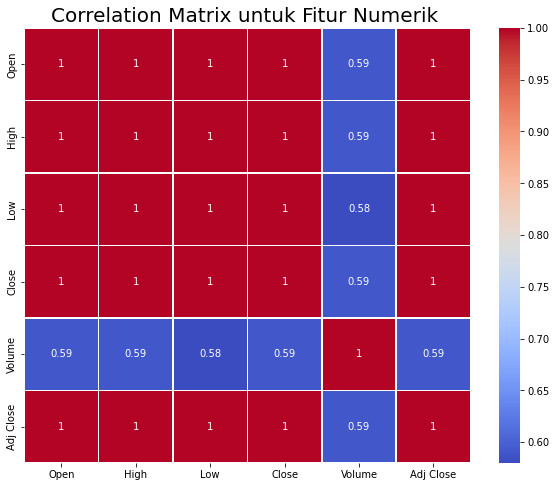

In [48]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20) 

In [22]:
Tesla = df.drop(['Date', 'Volume', 'Close'], axis=1)
Tesla.head()

,Open,High,Low,Adj Close
2,25.000000,25.920000,20.270000,21.959999
3,23.000000,23.100000,18.709999,19.200001
4,20.000000,20.000000,15.830000,16.110001
5,16.400000,16.629999,14.980000,15.800000
6,16.139999,17.520000,15.570000,17.459999


# Splitting Data

In [23]:
X = Tesla.iloc[:, :-1].values
y = Tesla.iloc[:, -1].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


In [25]:
print('X_train has', len(X_train), 'records')
print('y_train has', len(y_train), 'records')
print('X_test has', len(X_test), 'records')
print('y_test has', len(y_test), 'records')

X_train has 1289 records
y_train has 1289 records
X_test has 323 records
y_test has 323 records


# Normalization

In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'],
                      index=['SVR', 'KNN', 'GradientBoosting'])

# Modelling

In [28]:
def grid_search(model, hyperparameters):
  results = GridSearchCV(
      model,
      hyperparameters,
      cv=5,
      verbose=1,
      n_jobs=6
  )

  return results

In [29]:
svr = SVR()
hyperparameters = {
    'kernel': ['rbf'],
    'C': [0.001, 0.01, 0.1, 10, 100, 1000],
    'gamma': [0.3, 0.03, 0.003, 0.0003]
}

svr_search = grid_search(svr, hyperparameters)
svr_search.fit(X_train, y_train)
print(svr_search.best_params_)
print(svr_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'C': 1000, 'gamma': 0.3, 'kernel': 'rbf'}
0.9997692611294478


In [30]:
knn = KNeighborsRegressor()
hyperparameters = {
    'n_neighbors': range(1, 10)
}

knn_search = grid_search(knn, hyperparameters)
knn_search.fit(X_train, y_train)
print(knn_search.best_params_)
print(knn_search.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 4}
0.9996214288958484


In [31]:
gradient_boost = GradientBoostingRegressor()
hyperparameters = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'n_estimators': [250, 500, 750, 1000],
    'criterion': ['friedman_mse', 'squared_error']
}

gradient_boost_search = grid_search(gradient_boost, hyperparameters)
gradient_boost_search.fit(X_train, y_train)
print(gradient_boost_search.best_params_)
print(gradient_boost_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 1000}
0.9996113470107273


# Fitting Model

In [32]:
svr = SVR(C=1000, gamma=0.003, kernel='rbf')
svr.fit(X_train, y_train)


SVR(C=1000, gamma=0.003)

In [33]:
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [34]:
gradient_boost = GradientBoostingRegressor(criterion='squared_error',
                                           learning_rate=0.01, n_estimators=1000)
gradient_boost.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.01,
                          n_estimators=1000)

# Model Evaluation

In [35]:
model_dict = {
    'SVR': svr,
    'KNN': knn,
    'GradientBoosting': gradient_boost,
    
}

for name, model in model_dict.items():
  models.loc[name, 'train_mse'] = mean_squared_error(y_train, model.predict(X_train))
  models.loc[name, 'test_mse'] = mean_squared_error(y_test, model.predict(X_test))

models.head()

,train_mse,test_mse
SVR,4.614288,4.49862
KNN,2.158327,3.0382
GradientBoosting,1.355092,4.037711


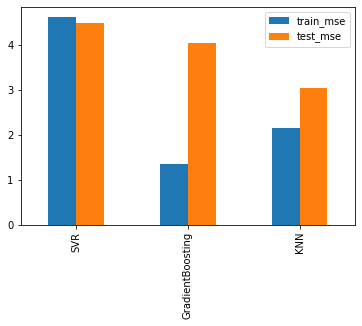

In [36]:
models.sort_values(by='test_mse', ascending=False).plot(kind='bar', zorder=3)

In [37]:
svr_acc = svr.score(X_test, y_test)*100
knn_acc = knn.score(X_test, y_test)*100
boosting_acc = gradient_boost.score(X_test, y_test)*100

In [38]:
evaluation_list = [[svr_acc], [knn_acc], [boosting_acc]]
evaluation = pd.DataFrame(evaluation_list,
                          columns = ['Accuracy (%)'],
                          index = ['SVR', 'KNN', 'Gradient Boost'])

evaluation

,Accuracy (%)
SVR,99.949613
KNN,99.965970
Gradient Boost,99.954775


# Forecasting Price

In [39]:
X_30=X[-30:]
forecast=knn.predict(X_30)

In [43]:
forecast=pd.DataFrame(forecast,columns=['Forecast'])
Tesla = Tesla.append(forecast)
Tesla.drop(['High', 'Low', 'Open'],axis=1,inplace=True)

In [44]:
Tesla.tail(35)

,Adj Close,Forecast
1687,246.169998,NaN
1688,258.000000,NaN
1689,255.729996,NaN
1690,262.049988,NaN
1691,261.500000,NaN
0,NaN,280.830007
1,NaN,280.830007
2,NaN,280.830007
3,NaN,280.830007
4,NaN,280.830007
